# EDA

## Libraries

In [ ]:
import pandas as pd
from collections import Counter
import re

import matplotlib.pyplot as plt
import seaborn as sns

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS

## Load the dataset

In [10]:
# Path to your exploratory dataset
file_path = r"C:\Users\Admin\OneDrive - United States International University (USIU)\Documents\KULU_Doc\Projects\AB test\web-ab-testing-analysis\data\upworthy-archive-exploratory-packages-03.12.2020.csv"

# Load CSV
df = pd.read_csv(file_path)

# Check first rows
df.head()


,Unnamed: 0,created_at,updated_at,clickability_test_id,excerpt,headline,lede,slug,eyecatcher_id,impressions,clicks,significance,first_place,winner,share_text,square,test_week
0,0,2014-11-20 06:43:16.005,2016-04-02 16:33:38.062,546d88fb84ad38b2ce000024,Things that matter. Pass 'em on.,They're Being Called 'Walmart's Worst Nightmar...,"<p>When I saw *why* people are calling them ""W...",theyre-being-called-walmarts-worst-nightmare-a...,546d6fa19ad54eec8d00002d,3052,150,100.0,True,True,Anyone who's ever felt guilty about shopping a...,NaN,201446
1,1,2014-11-20 06:43:44.646,2016-04-02 16:25:54.021,546d88fb84ad38b2ce000024,Things that matter. Pass 'em on.,They're Being Called 'Walmart's Worst Nightmar...,"<p>When I saw *why* people are calling them ""W...",theyre-being-called-walmarts-worst-nightmare-a...,546d6fa19ad54eec8d00002d,3033,122,14.0,False,False,Walmart is getting schooled by another retaile...,NaN,201446
2,2,2014-11-20 06:44:59.804,2016-04-02 16:25:54.024,546d88fb84ad38b2ce000024,Things that matter. Pass 'em on.,They're Being Called 'Walmart's Worst Nightmar...,"<p>When I saw *why* people are calling them ""W...",theyre-being-called-walmarts-worst-nightmare-a...,546d6fa19ad54eec8d00002d,3092,110,1.8,False,False,Walmart may not be crapping their pants over t...,NaN,201446
3,3,2014-11-20 06:54:36.335,2016-04-02 16:25:54.027,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546bc55335992b86c8000043,3526,90,4.1,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446
4,4,2014-11-20 06:54:57.878,2016-04-02 16:31:45.671,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714cd2dd00002e,3506,120,100.0,True,False,"If you ever wondered, ""but what about the men?...",NaN,201446


In [11]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22666 entries, 0 to 22665
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            22666 non-null  int64  
 1   created_at            22666 non-null  object 
 2   updated_at            22666 non-null  object 
 3   clickability_test_id  22666 non-null  object 
 4   excerpt               20249 non-null  object 
 5   headline              22666 non-null  object 
 6   lede                  22654 non-null  object 
 7   slug                  22666 non-null  object 
 8   eyecatcher_id         22644 non-null  object 
 9   impressions           22666 non-null  int64  
 10  clicks                22666 non-null  int64  
 11  significance          22666 non-null  float64
 12  first_place           22666 non-null  bool   
 13  winner                22666 non-null  bool   
 14  share_text            3208 non-null   object 
 15  square             

Unnamed: 0                  0
created_at                  0
updated_at                  0
clickability_test_id        0
excerpt                  2417
headline                    0
lede                       12
slug                        0
eyecatcher_id              22
impressions                 0
clicks                      0
significance                0
first_place                 0
winner                      0
share_text              19458
square                  15220
test_week                   0
dtype: int64

In [28]:
df['ctr'] = df['clicks'] / df['impressions']

# Top 10 headlines by CTR
df.sort_values(by='ctr', ascending=False).head(10)


,Unnamed: 0,created_at,updated_at,clickability_test_id,excerpt,headline,lede,slug,eyecatcher_id,impressions,...,significance,first_place,winner,share_text,square,test_week,sentiment_score,sentiment,day_of_week,ctr
38739,55439,2013-07-30 18:02:51.878,2016-04-02 16:27:17.988,51f7ff08f114bc18ba007025,Things that matter. Pass 'em on.\n\n,Her Dad Thinks Being Gay Was Her Choice. The W...,<p>\n\t As the gay child of two <em>very</e...,her-dad-thinks-being-gay-was-her-choice-the-wo...,5332bdce1fae79f09f008a23,2470,...,100.0,True,False,NaN,5.png,201330,0.4404,Positive,Tuesday,0.183401
37187,53218,2013-07-15 07:26:41.342,2016-04-02 16:27:11.306,51e3a344be1e2cdda3002a74,It's about something far bigger than you thought.,"In Case You Missed It, Here's What The Trayvon...",<p>\n\t ...,in-case-you-missed-it-heres-what-the-trayvon-m...,5332bd1d1fae79f09f007ac7,11,...,0.0,False,False,NaN,trayvon4-1.jpg,201328,-0.2960,Negative,Monday,0.181818
100678,143889,2015-04-20 19:33:26.260,2016-04-02 16:32:25.329,5535537b646339001c260000,When I realized how dangerous too much sitting...,Canceling out the harmful effects of sitting i...,<p>When I realized how dangerous too much sitt...,canceling-out-the-harmful-effects-of-sitting-i...,5535547b313633000c010000,1948,...,1.7,False,False,NaN,NaN,201516,0.4215,Positive,Monday,0.179671
39518,56545,2013-08-07 15:34:57.052,2016-04-02 16:27:21.534,520268fddb7593ebfb0092ff,Things that matter. Pass 'em on.,"If This Reality Is So Obvious To Kids, Why Can...",<div>\n\t Have you ever noticed that people ...,if-this-reality-is-so-obvious-to-kids-why-cant...,5332be281fae79f09f009215,18,...,0.0,False,False,NaN,Thumbnail7B30B50.jpg,201331,0.0000,Neutral,Wednesday,0.166667
42303,60494,2013-09-02 20:14:36.616,2016-04-02 16:27:32.989,5224f18861202c84890000e9,Things that matter. Pass 'em on.,What Can Happen In A Flash Of A Second? He Stu...,<p>\n\tHave you ever driven in the desert and ...,what-can-happen-in-a-flash-of-a-second-he-stuc...,5332bf561fae79f09f00b01d,6,...,0.0,False,False,NaN,flood_thumb_1.png,201335,-0.2500,Negative,Monday,0.166667
38736,55436,2013-07-30 18:01:54.890,2016-04-02 16:27:17.981,51f7ff08f114bc18ba007025,Things that matter. Pass 'em on.\n\n,Her Dad Thinks Being Gay Was Her Choice. The W...,<p>\n\t As the gay child of two <em>very</e...,her-dad-thinks-being-gay-was-her-choice-the-wo...,5332bdce1fae79f09f008a1d,2934,...,2.5,False,False,NaN,2.png,201330,0.4404,Positive,Tuesday,0.156101
43131,61681,2013-09-09 21:27:01.378,2016-04-02 16:27:36.577,522e350a7799c66866000dd5,Things that matter. Pass 'em on.,A Boy Makes Anti-Muslim Comments In Front Of A...,<p>\n\t This powerful social experiment...,a-boy-makes-anti-muslim-comments-in-front-of-a...,5332bfaa1fae79f09f00b824,2713,...,100.0,True,False,NaN,Screen_Shot_2013-09-08_at_9.37.52_PM.png,201336,0.0000,Neutral,Monday,0.148913
38971,55786,2013-07-31 22:03:12.162,2016-04-02 16:27:18.982,51f9887485c659d650000058,Can you believe some condescending geek guys t...,Some Geek Boys Called These Geek Girls 'Fake.'...,<p>\n\t If you're a lady-human of the geek ...,some-geek-boys-called-these-geek-girls-fake-th...,5332bdd51fae79f09f008ab0,2111,...,100.0,True,False,NaN,1.jpg,201330,-0.3818,Negative,Wednesday,0.141639
38585,55236,2013-07-29 19:38:50.321,2016-04-02 16:27:17.441,51f6c3bab7a5dfeb3c0006e6,Things that matter. Pass 'em on.,A Celebrity Couple Are Hounded By Paparazzi As...,<p>\n\t Celebrities tell us over and ove...,a-celebrity-couple-are-hounded-by-paparazzi-as...,5332bdbf1fae79f09f0088c3,1717,...,0.0,False,False,NaN,Screen_Shot_2013-07-29_at_12.27.40_PM.png,201330,0.5994,Positive,Monday,0.139779
36543,52304,2013-07-08 22:05:58.504,2016-04-02 16:27:08.788,51db378f9d66b14ece00055b,A famous actor makes a frightening discovery a...,Dustin Hoffman Breaks Down Crying Explaining S...,"<p>Back in the day, for those of you younger f...",dustin-hoffman-breaks-down-crying-explaining-s...,5332bcd71fae79f09f00746c,3650,...,100.0,True,True,NaN,hoffman9.jpg,201327,-0.7096,N

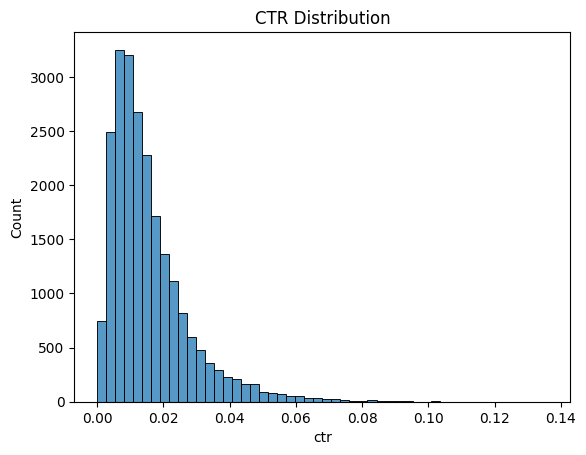

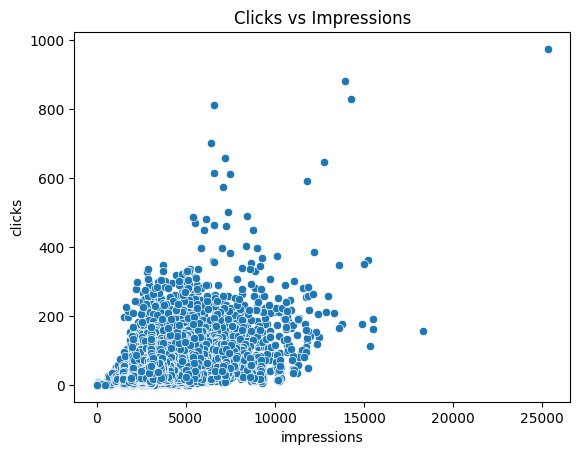

In [13]:
# CTR distribution
sns.histplot(df['ctr'], bins=50)
plt.title("CTR Distribution")
plt.show()

# Clicks vs Impressions scatter
sns.scatterplot(data=df, x='impressions', y='clicks')
plt.title("Clicks vs Impressions")
plt.show()


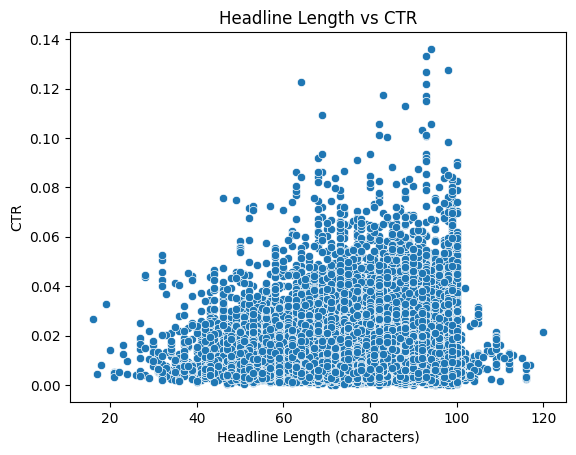

Correlation between headline length and CTR: 0.05619304088158036


In [8]:
# Headline length in characters
exploratory_df['headline_length'] = exploratory_df['headline'].str.len()

# Scatter plot
sns.scatterplot(data=exploratory_df, x='headline_length', y='ctr')
plt.title("Headline Length vs CTR")
plt.xlabel("Headline Length (characters)")
plt.ylabel("CTR")
plt.show()

# Correlation
print("Correlation between headline length and CTR:", exploratory_df['headline_length'].corr(exploratory_df['ctr']))

## Top words in headlines

In [14]:
# Select top 10% CTR headlines
top_df = df[df['ctr'] >= df['ctr'].quantile(0.9)]

# Extract words
words = " ".join(top_df['headline'].astype(str)).lower()
words = re.findall(r'\b\w+\b', words)
word_counts = Counter(words)

# Top 20 words
word_counts.most_common(20)


[('a', 1373),
 ('the', 1223),
 ('to', 879),
 ('s', 630),
 ('you', 588),
 ('this', 580),
 ('of', 536),
 ('in', 461),
 ('it', 446),
 ('and', 423),
 ('is', 416),
 ('t', 344),
 ('what', 338),
 ('that', 332),
 ('her', 324),
 ('i', 316),
 ('she', 306),
 ('they', 279),
 ('about', 275),
 ('for', 273)]

#### Stop words

In [15]:
stop_words = set([
    'a', 'the', 'to', 'of', 'in', 'it', 'and', 'is', 's', 't', 'i', 'you', 
    'that', 'for', 'on', 'with', 'as', 'this', 'at', 'by', 'from', 'her', 'they', 'about'
])


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
C:\Users\Admin\AppData\Local\Temp\ipykernel_1808\3228402149.py:6: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


sentiment
Positive    43547
Negative    36185
Neutral     25819
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_1808\3228402149.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


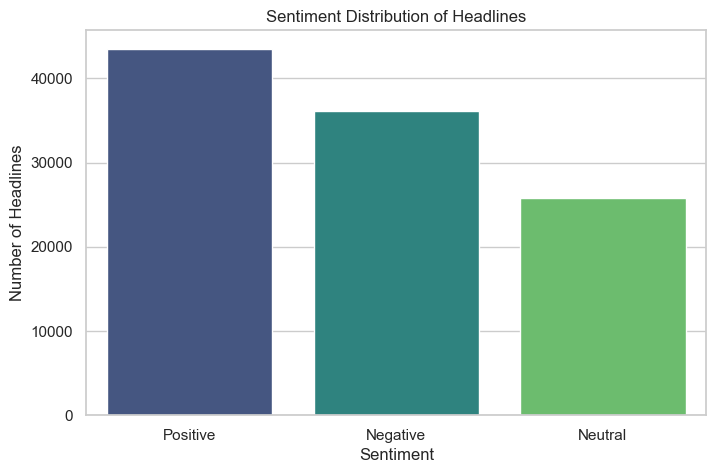

In [18]:

# Download VADER lexicon
nltk.download('vader_lexicon')

# Load your dataset (replace with the actual path)
file_path = r"C:\Users\Admin\OneDrive - United States International University (USIU)\Documents\KULU_Doc\Projects\AB test\web-ab-testing-analysis\data\upworthy-archive-confirmatory-packages-03.12.2020.csv"
df = pd.read_csv(file_path)

# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis on the 'headline' column
df['sentiment_score'] = df['headline'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

# Classify sentiment
def classify_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['sentiment_score'].apply(classify_sentiment)

# Display sentiment counts
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

# Visualize sentiment distribution
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Sentiment Distribution of Headlines")
plt.ylabel("Number of Headlines")
plt.xlabel("Sentiment")
plt.show()


In [29]:
# Combine all headlines into one string
text = " ".join(str(headline) for headline in df['headline'])

# Define stopwords
stopwords = set(STOPWORDS)
stopwords.update(["The", "A", "To", "In", "It", "This", "And", "Of"])  # add more if needed

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      stopwords=stopwords, colormap='viridis',
                      max_words=100).generate(text)


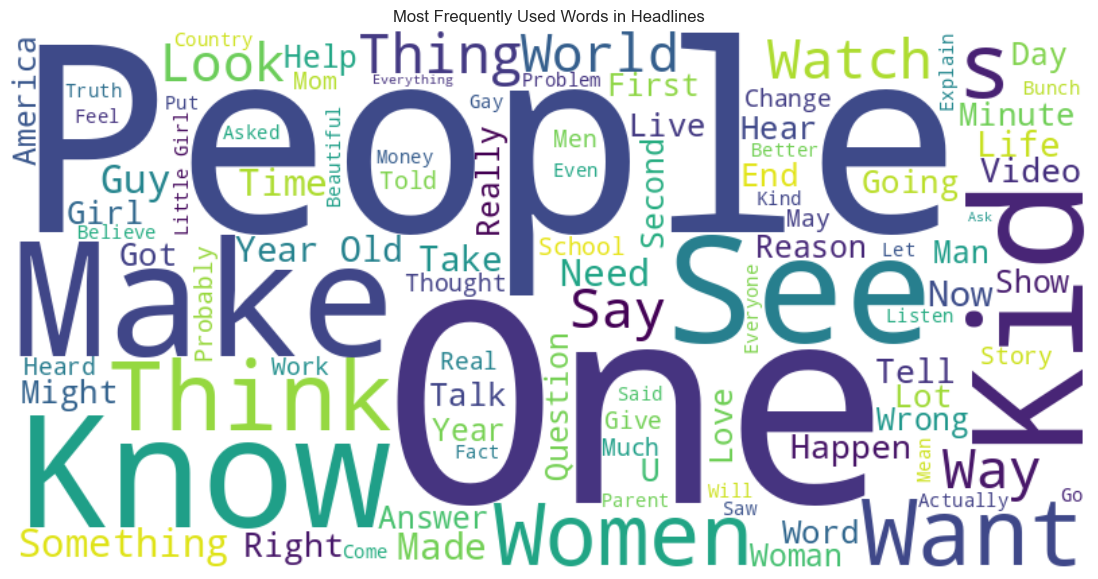

In [30]:
# Plot the word cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequently Used Words in Headlines")
plt.show()

In [34]:
# Total number of headlines
total_headlines = len(df['headline'])
print("Total headlines:", total_headlines)

# Number of unique headlines
unique_headlines = df['headline'].nunique()
print("Unique headlines:", unique_headlines)

# Most repeated headlines (top 10)
top_headlines = df['headline'].value_counts().head(10)
print(top_headlines)


Total headlines: 105551
Unique headlines: 48968
headline
Dustin Hoffman Breaks Down Crying Explaining Something That Every Woman Sadly Already Experienced    123
Ellen, Katy Perry, And A Hockey Player Walk Into A Commercial And Destroy A Silly Argument            65
If Your Don't Let Your Partner Do This In The Bedroom, You Might As Well Break Up With Them Now       50
In 1980, She Made A Statement. In 2014, All These Awesome Famous People Did Too.                      48
I'm Actually Comfortable With These People Hacking The Government                                     47
This Father Has Something To Say To The Boys Who Want To Date His Daughter. Well Played.              47
Please Stop Going To The Circus. It’s An Awful Place. I’ll Prove It If You Give Me 1 Minute.          47
This test will tell you whether you're prejudiced without knowing it. I dare you to take it.          42
Don't Believe In Two Different Americas? Here's All The Proof You Need. Which One Do You Live In?     4

In [32]:
df.columns

Index(['Unnamed: 0', 'created_at', 'updated_at', 'clickability_test_id',
       'excerpt', 'headline', 'lede', 'slug', 'eyecatcher_id', 'impressions',
       'clicks', 'significance', 'first_place', 'winner', 'share_text',
       'square', 'test_week', 'sentiment_score', 'sentiment', 'day_of_week',
       'ctr'],
      dtype='object')

day_of_week
Monday       0.016903
Saturday     0.016836
Sunday       0.016065
Tuesday      0.015854
Thursday     0.015408
Friday       0.015242
Wednesday    0.015229
Name: ctr, dtype: float64


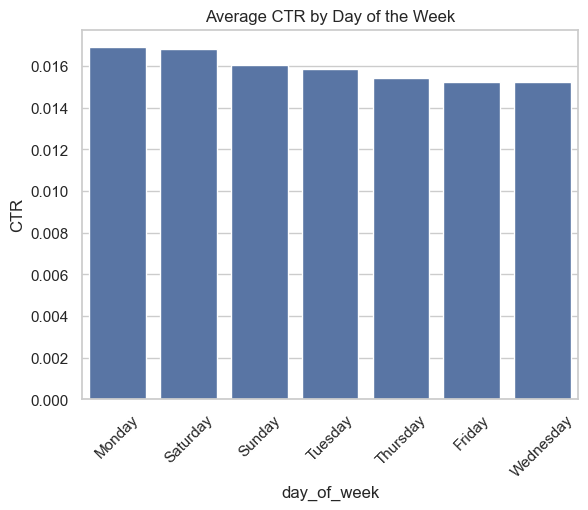

In [33]:
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')

df['day_of_week'] = df['created_at'].dt.day_name()

# Average CTR by day
day_ctr = df.groupby('day_of_week')['ctr'].mean().sort_values(ascending=False)
print(day_ctr)

# Plot
sns.barplot(x=day_ctr.index, y=day_ctr.values)
plt.xticks(rotation=45)
plt.title("Average CTR by Day of the Week")
plt.ylabel("CTR")
plt.show()


In [36]:
from sklearn.feature_extraction.text import CountVectorizer

# Use bigrams or trigrams
vectorizer = CountVectorizer(ngram_range=(2,5), stop_words='english')
X = vectorizer.fit_transform(df['headline'])

# Sum the counts
phrase_counts = X.sum(axis=0)
phrases_freq = [(phrase, phrase_counts[0, idx]) for phrase, idx in vectorizer.vocabulary_.items()]
phrases_freq = sorted(phrases_freq, key=lambda x: x[1], reverse=True)

# Top 20 phrases
print(phrases_freq[:20])


[('year old', 1577), ('looks like', 724), ('years ago', 580), ('little girl', 576), ('ve seen', 511), ('minimum wage', 479), ('ve heard', 469), ('look like', 467), ('climate change', 460), ('good reason', 380), ('john oliver', 375), ('white people', 374), ('gay marriage', 362), ('don know', 356), ('don want', 311), ('black people', 290), ('jon stewart', 287), ('want know', 282), ('need know', 272), ('don think', 271)]


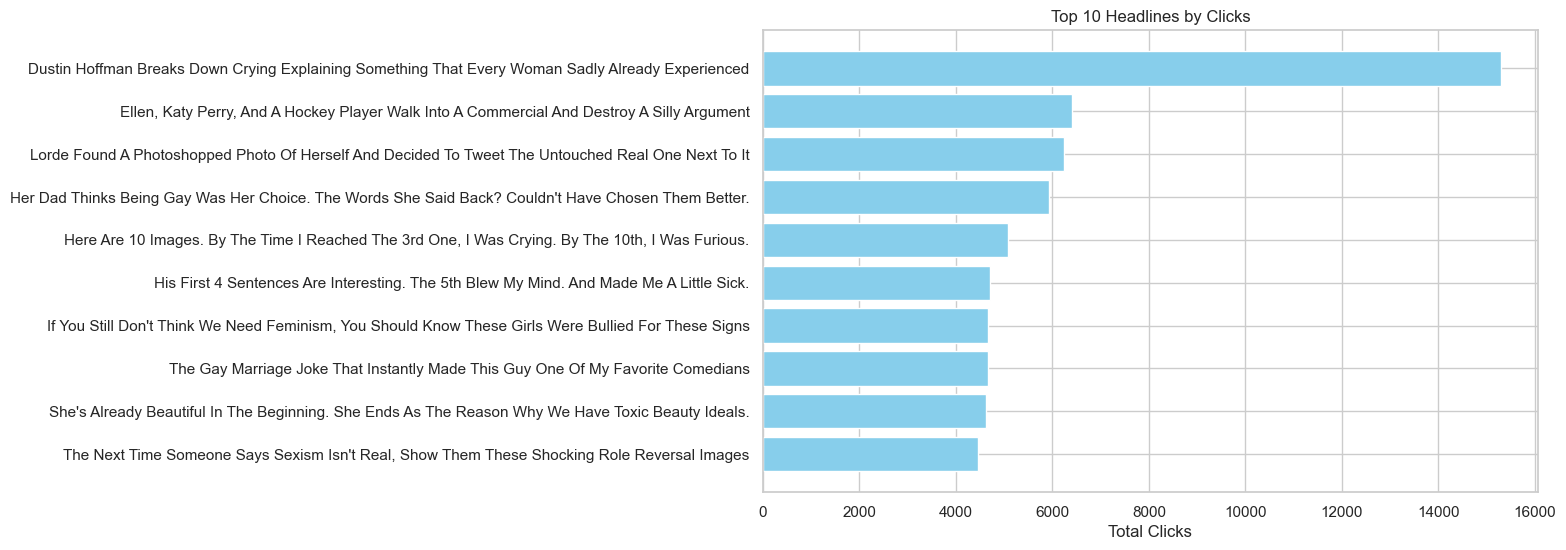

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(top_headlines.index, top_headlines['clicks'], color='skyblue')
plt.xlabel('Total Clicks')
plt.title('Top 10 Headlines by Clicks')
plt.gca().invert_yaxis()  # So the headline with most clicks is on top
plt.show()


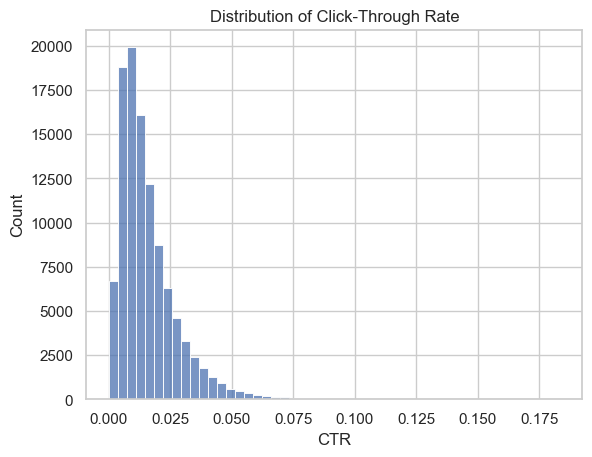

In [44]:
df['CTR'] = df['clicks'] / df['impressions']
import seaborn as sns

sns.histplot(df['CTR'], bins=50)
plt.title('Distribution of Click-Through Rate')
plt.xlabel('CTR')
plt.show()


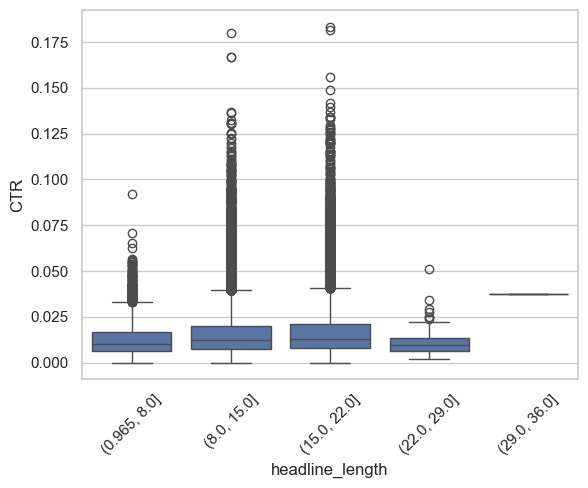

In [46]:
df['headline_length'] = df['headline'].apply(lambda x: len(x.split()))
sns.boxplot(x=pd.cut(df['headline_length'], bins=5), y=df['CTR'])
plt.xticks(rotation=45)
plt.show()


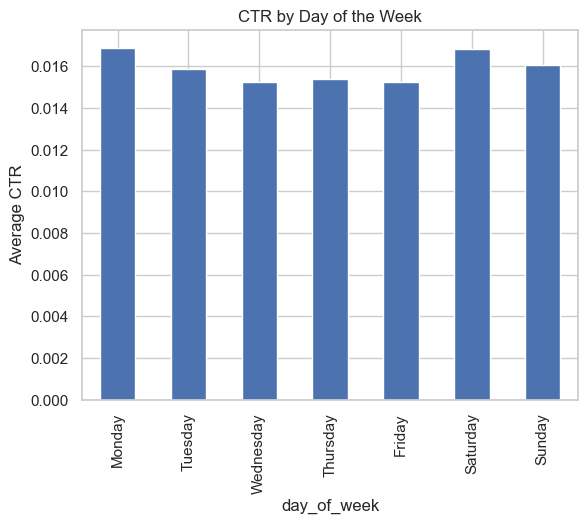

In [47]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['day_of_week'] = df['created_at'].dt.day_name()

ctr_by_day = df.groupby('day_of_week')['CTR'].mean().reindex([
    'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'
])

ctr_by_day.plot(kind='bar')
plt.ylabel('Average CTR')
plt.title('CTR by Day of the Week')
plt.show()


- *Posts published on Saturdays have the highest engagement.*

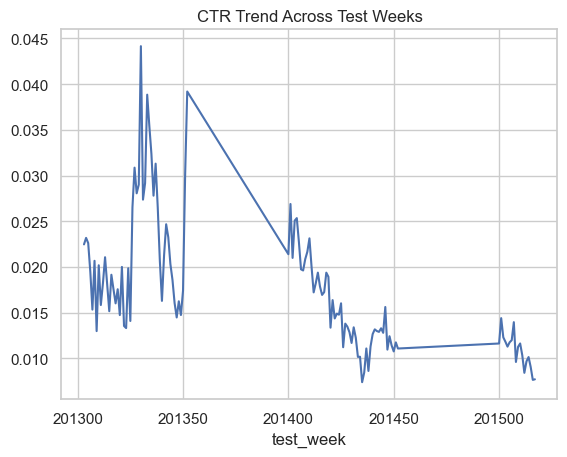

In [48]:
df.groupby('test_week')['CTR'].mean().plot(kind='line')
plt.title('CTR Trend Across Test Weeks')
plt.show()


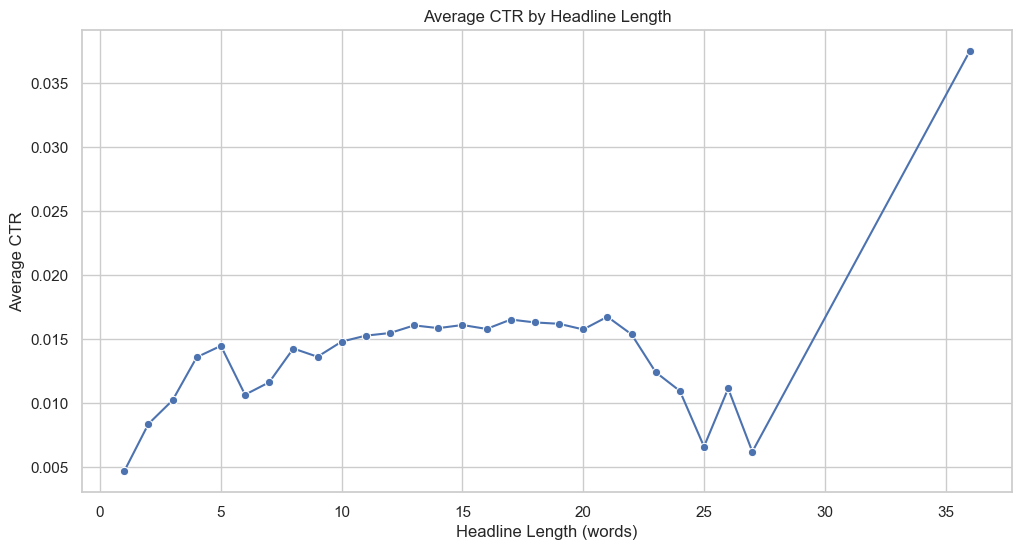

In [49]:
df['headline_length'] = df['headline'].apply(lambda x: len(x.split()))
df['CTR'] = df['clicks'] / df['impressions']

length_stats = df.groupby('headline_length')['CTR'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=length_stats, x='headline_length', y='CTR', marker='o')
plt.title('Average CTR by Headline Length')
plt.xlabel('Headline Length (words)')
plt.ylabel('Average CTR')
plt.show()


- **Ho**: Headlines with 10–15 words get the highest CTR.
- **H1**: Headlines length has no any relationship with CTR.

In [51]:
df.columns

Index(['Unnamed: 0', 'created_at', 'updated_at', 'clickability_test_id',
       'excerpt', 'headline', 'lede', 'slug', 'eyecatcher_id', 'impressions',
       'clicks', 'significance', 'first_place', 'winner', 'share_text',
       'square', 'test_week', 'sentiment_score', 'sentiment', 'day_of_week',
       'ctr', 'CTR', 'headline_length'],
      dtype='object')

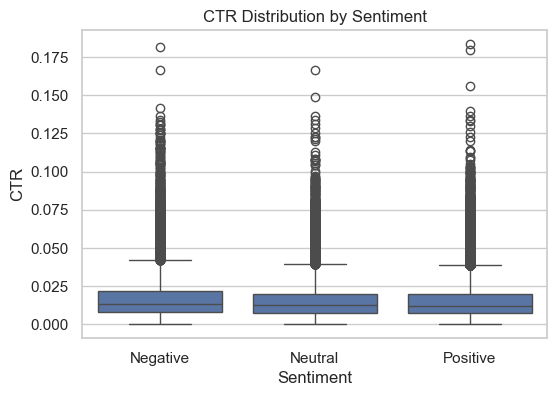

In [52]:
plt.figure(figsize=(6,4))
sns.boxplot(x='sentiment', y='ctr', data=df)
plt.title('CTR Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('CTR')
plt.show()


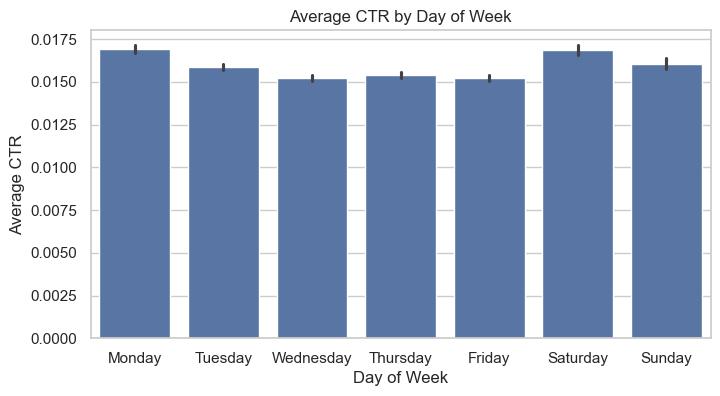

In [55]:
import numpy as np
plt.figure(figsize=(8,4))
sns.barplot(x='day_of_week', y='ctr', data=df, estimator=np.mean, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Average CTR by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average CTR')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_1808\4215731020.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='clicks', y=top_headlines.index, data=top_headlines, palette="viridis")


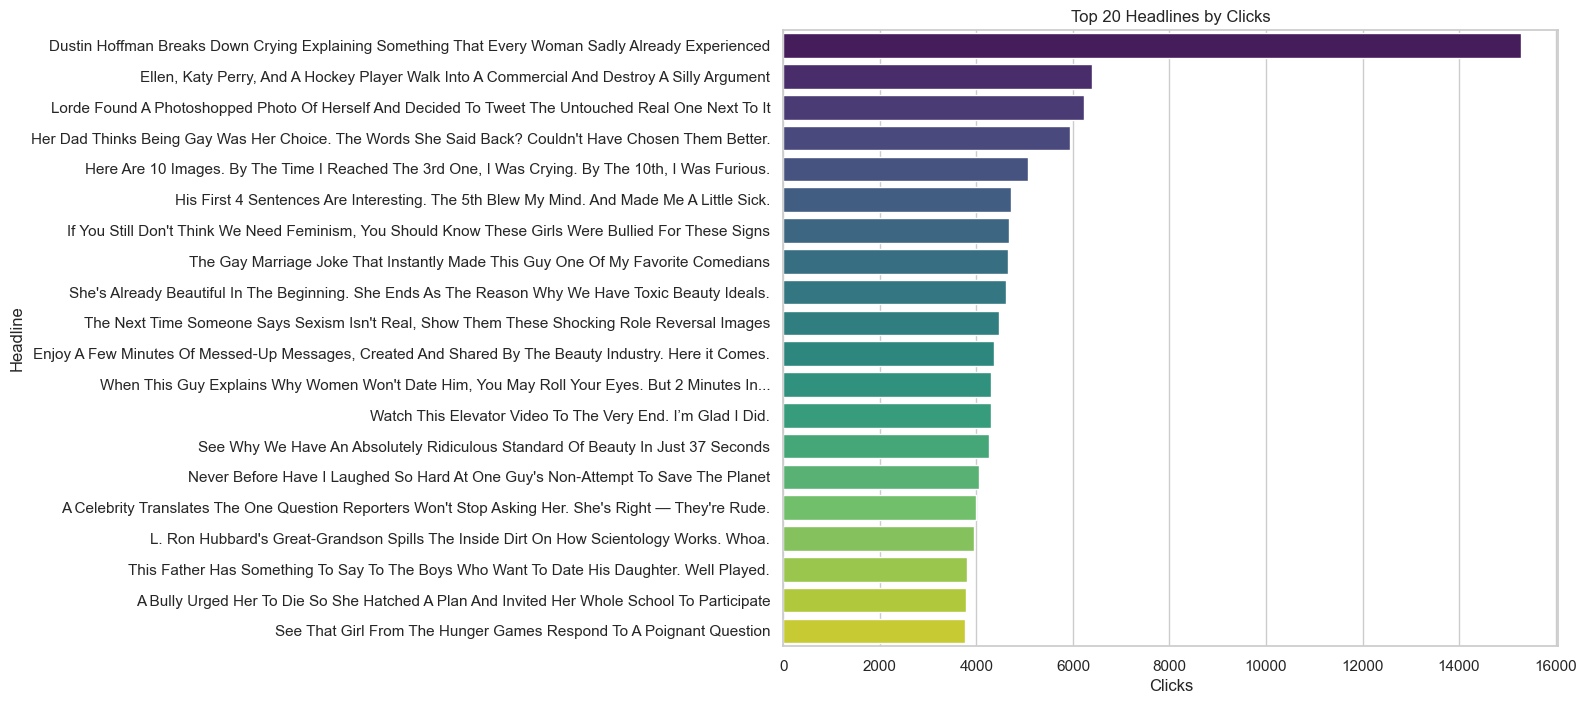

In [56]:
top_headlines = headline_stats.sort_values(by='clicks', ascending=False).head(20)

plt.figure(figsize=(10,8))
sns.barplot(x='clicks', y=top_headlines.index, data=top_headlines, palette="viridis")
plt.title('Top 20 Headlines by Clicks')
plt.xlabel('Clicks')
plt.ylabel('Headline')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_1808\1000278686.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ctr', y=top_headlines_ctr.index, data=top_headlines_ctr, palette="magma")


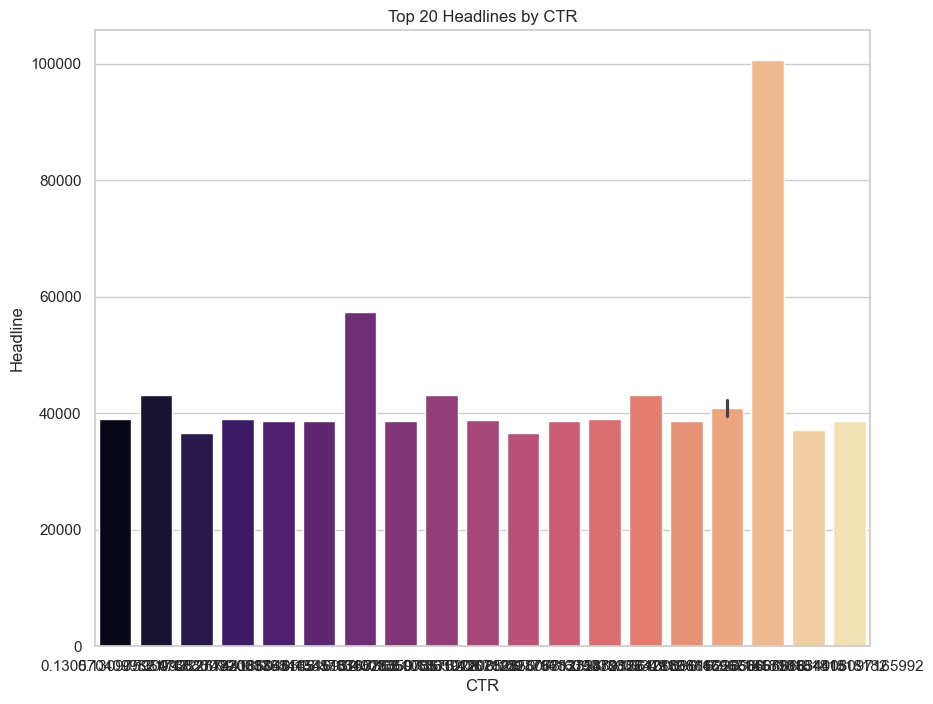

In [57]:
df['ctr'] = df['clicks'] / df['impressions']
top_headlines_ctr = df.sort_values(by='ctr', ascending=False).head(20)

plt.figure(figsize=(10,8))
sns.barplot(x='ctr', y=top_headlines_ctr.index, data=top_headlines_ctr, palette="magma")
plt.title('Top 20 Headlines by CTR')
plt.xlabel('CTR')
plt.ylabel('Headline')
plt.show()


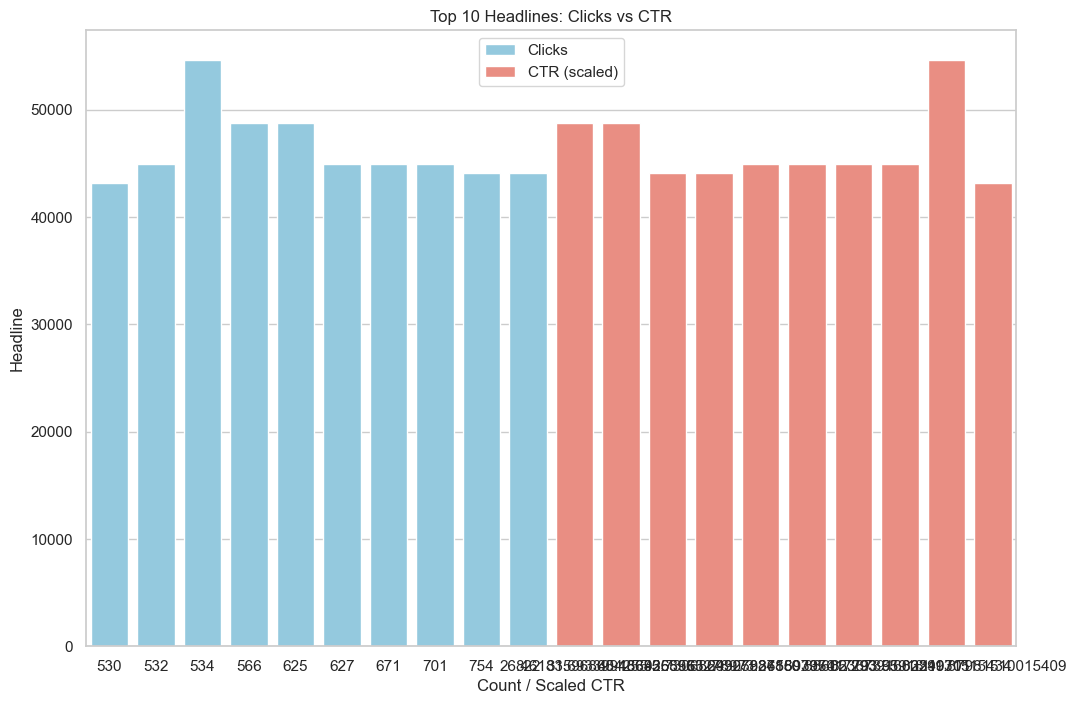

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 10 headlines by clicks
top_headlines = df.sort_values(by='clicks', ascending=False).head(10)

# Normalize CTR to a comparable scale for visualization (optional)
top_headlines['ctr_scaled'] = top_headlines['ctr'] * top_headlines['clicks'].max()

plt.figure(figsize=(12,8))

# Plot clicks
sns.barplot(x='clicks', y=top_headlines.index, data=top_headlines, color='skyblue', label='Clicks')

# Plot scaled CTR
sns.barplot(x='ctr_scaled', y=top_headlines.index, data=top_headlines, color='salmon', label='CTR (scaled)')

plt.title('Top 10 Headlines: Clicks vs CTR')
plt.xlabel('Count / Scaled CTR')
plt.ylabel('Headline')
plt.legend()
plt.show()
